In [6]:
# graph showing the effectiveness of three popular antibiotics on 16 different bacteria
# parody of the Will Burtin graphic

In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [227]:
df = pd.read_csv("data/bacteria.csv")

In [231]:
df[df.name == 'Staphylococcus albus']

,name,penicillin,streptomycin,neomycin,gram
12,Staphylococcus albus,0.007,0.1,0.001,positive


In [109]:
from sklearn.preprocessing import normalize
df_ = pd.DataFrame(normalize(df.iloc[:,1:4], axis=0))
df_.insert(0, 'name', df['name'])
df_.columns = ['name', 'penicillin', 'streptomycin', 'neomycin']

In [113]:
df_.head(3)

,name,penicillin,streptomycin,neomycin
0,Mycobacterium tuberculosis,0.473712,0.234553,0.047039
1,Salmonella schottmuelleri,0.005921,0.037528,0.002117
2,Proteus vulgaris,0.001776,0.004691,0.002352


In [114]:
#myDict = {'negative': -1, 'positive': 1}

df_['ratio'] = df.gram.apply(lambda x: (1 if x == 'positive' else -1))

df_['penicillin'] = df_['penicillin'] * df_.ratio
df_['streptomycin'] = df_['neomycin'] * df_.ratio
df_['neomycin'] = df_['neomycin'] * df_.ratio

In [116]:
del df_['ratio']

In [117]:
df_.head(3)

,name,penicillin,streptomycin,neomycin
0,Mycobacterium tuberculosis,-0.473712,-0.047039,-0.047039
1,Salmonella schottmuelleri,-0.005921,-0.002117,-0.002117
2,Proteus vulgaris,-0.001776,-0.002352,-0.002352


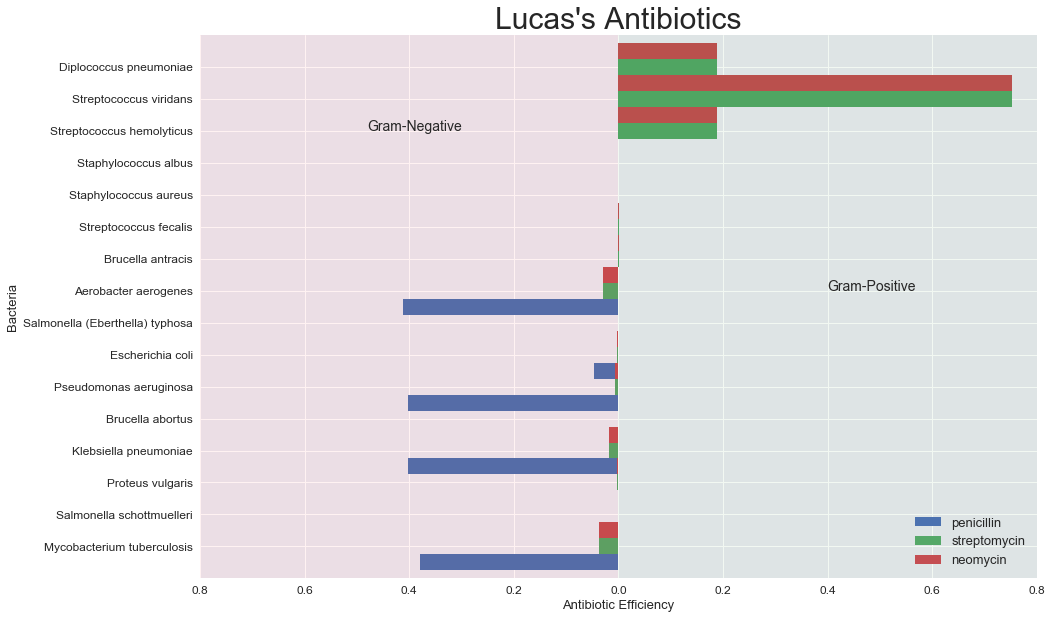

In [232]:
#fig = plt.figure(figsize=(10,5))
#ax = fig.add_subplot(111)

g = df_.plot(x='name', 
            kind='barh',
            figsize=(15,10),
            fontsize=12,
            width=1.5

)

g.set_title('Lucas\'s Antibiotics', fontsize= 30)
g.set_xlim([-1, 1])
g.set_xticklabels([0.8, 0.6, 0.4, 0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

g.set_xlabel("Antibiotic Efficiency", fontsize=13)
g.set_ylabel("Bacteria", fontsize=13)

g.axvspan(-1, 0, color='r', alpha=0.05, lw=0)
g.axvspan(0, 1, color='g', alpha=0.05, lw=0)

g.text(-.6, 13, 'Gram-Negative', fontsize=14)
g.text(.5, 8, 'Gram-Positive', fontsize=14)

g.legend(loc=4,prop={'size':13})

None

In [208]:
_df_ = df.copy()

In [209]:
_df_.loc[_df_.gram == 'negative', ['neomycin', 'penicillin','streptomycin']] = -_df_.loc[df.gram == 'negative', ['neomycin', 'penicillin','streptomycin']]

In [210]:
_df_.head(3)

,name,penicillin,streptomycin,neomycin,gram
0,Mycobacterium tuberculosis,-800.0,-5.0,-2.00,negative
1,Salmonella schottmuelleri,-10.0,-0.8,-0.09,negative
2,Proteus vulgaris,-3.0,-0.1,-0.10,negative


In [211]:
_df_ = pd.DataFrame(normalize(_df_.iloc[:,1:4], axis=0))

In [212]:
_df_.insert(0, 'name', df['name'])
_df_.columns = ['name', 'penicillin', 'streptomycin', 'neomycin']

In [213]:
_df_.head(3)

,name,penicillin,streptomycin,neomycin
0,Mycobacterium tuberculosis,-0.473712,-0.234553,-0.047039
1,Salmonella schottmuelleri,-0.005921,-0.037528,-0.002117
2,Proteus vulgaris,-0.001776,-0.004691,-0.002352
